In [3]:
import numpy as np
import cv2
import skimage
from matplotlib import pyplot as plt

In [21]:
def hsl_to_rgb(h):
    x = (1 - abs((h / 60) % 2 - 1))
    if 0 <= h < 60:
        r_, g_, b_ = 1, x, 0
    elif 60 <= h < 120:
        r_, g_, b_ = x, 1, 0
    elif 120 <= h < 180:
        r_, g_, b_ = 0, 1, x
    elif 180 <= h < 240:
        r_, g_, b_ = 0, x, 1
    elif 240 <= h < 300:
        r_, g_, b_ = x, 0, 1
    else:
        r_, g_, b_ = 1, 0, x
    return (round(r_ * 255), round(g_ * 255), round(b_ * 255))

In [11]:
def SHOW(txt, img, **kwargs):
    plt.figure()
    plt.imshow(img, **kwargs)
    plt.title(txt)
    

In [23]:
def getLines(det_img, orig_img, filename=None):
    lines = cv2.HoughLinesP(det_img, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=3)
    graym = cv2.cvtColor(cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY), cv2.COLOR_GRAY2BGR)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]

            # graym = cv2.cvtColor(cv2.cvtColor(graym, cv2.COLOR_BGR2GRAY), cv2.COLOR_GRAY2BGR)
            cv2.line(graym, (x1, y1), (x2, y2), hsl_to_rgb(np.random.randint(0, 360)), 2)
            # cv2.imshow('Detected Lines', graym)
            # cv2.waitKey(0)

    # Show the image with detected lines
    if filename is not None:
        cv2.imwrite(filename, graym)
    SHOW('Detected Lines', graym, cmap='gray')
    # cv2.waitKey(0)

True

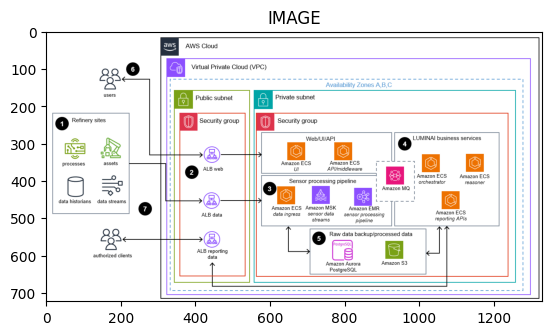

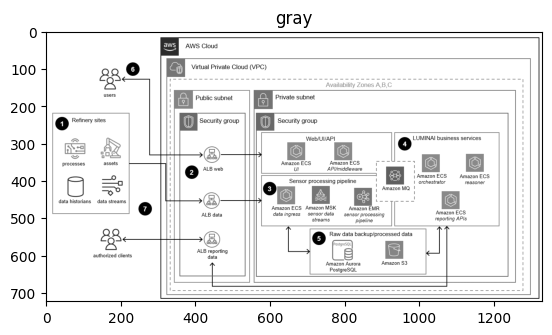

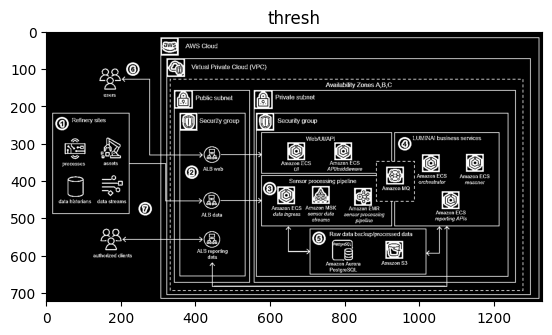

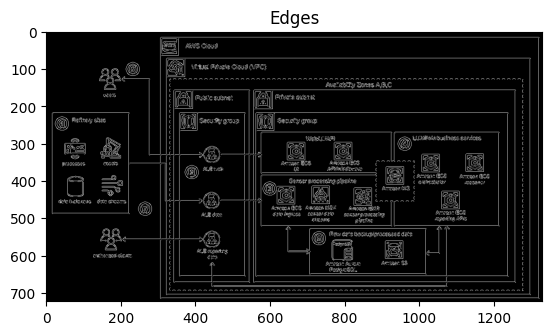

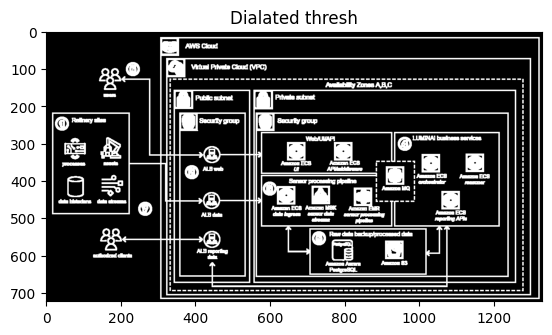

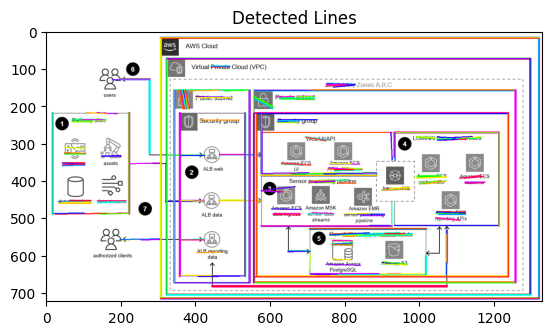

In [24]:
image_path = r"./test1.png"
image = cv2.imread(image_path)


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Use Canny edge detection
edges = cv2.Canny(thresh, 50, 150)

# Show the edges detected
SHOW('IMAGE', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
SHOW('gray', gray, cmap='gray')
SHOW('thresh', thresh, cmap='gray')
SHOW('Edges', edges, cmap='gray')
dial_thresh = cv2.dilate(thresh, np.ones((3, 3), np.uint8))
SHOW('Dialated thresh', dial_thresh, cmap='gray')


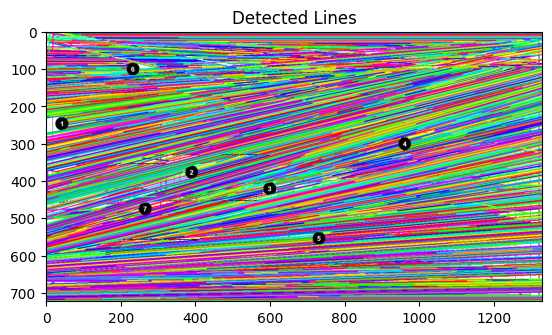

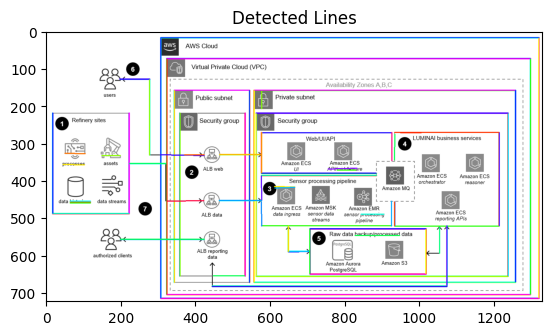

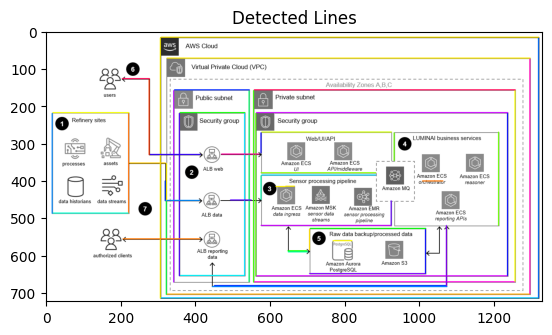

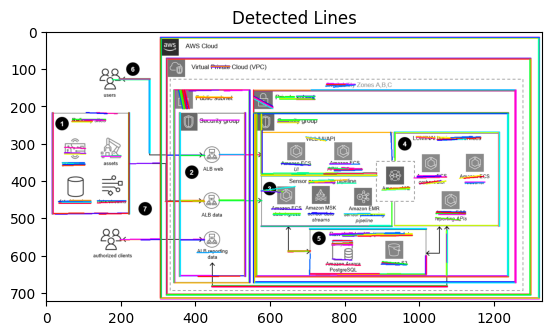

In [28]:
getLines(gray, image, './lines/gray.png')
getLines(thresh, image, './lines/thresh.png')
getLines(edges, image, './lines/Edges.png')
getLines(dial_thresh, image, './lines/dial_thresh.png')